In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("Heart Failure Prediction Dataset.csv")
df.iloc[:5]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df_age=df["Age"].unique()
df_Sex=df["Sex"].unique()
df_ChestPainType=df["ChestPainType"].unique()
df_RestingBP=df["RestingBP"].unique()
df_Cholesterol=df["Cholesterol"].unique()
df_FastingBS=df["FastingBS"].unique()
df_RestingECG=df["RestingECG"].unique()
df_MaxHR=df["MaxHR"].unique()
df_ExerciseAngina=df["ExerciseAngina"].unique()
df_Oldpeak=df["Oldpeak"].unique()
df_ST_Slope=df["ST_Slope"].unique()
df_HeartDisease=df["HeartDisease"].unique()
df_HeartDisease

array([0, 1])

In [6]:
df_unique=pd.DataFrame({"Sex":pd.Series(df_Sex),"ChestPainType":pd.Series(df_ChestPainType),"FastingBS":pd.Series(df_FastingBS),"RestingECG":pd.Series(df_RestingECG),"ExerciseAngina":pd.Series(df_ExerciseAngina),
                        "ST_Slope":pd.Series(df_ST_Slope)})
df_unique.head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,0.0,Normal,N,Up
1,F,NAP,1.0,ST,Y,Flat
2,NaN,ASY,NaN,LVH,NaN,Down
3,NaN,TA,NaN,NaN,NaN,NaN


In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


<Axes: >

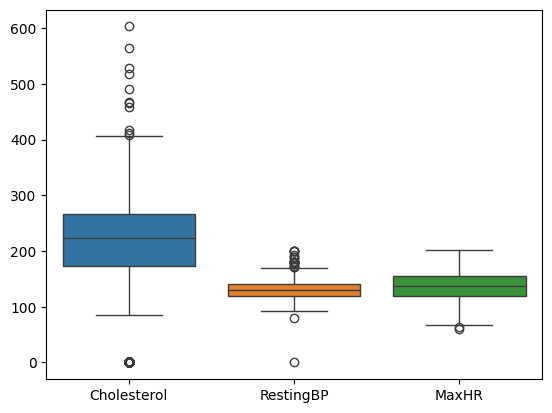

In [9]:
sns.boxplot(data=df[["Cholesterol","RestingBP","MaxHR"]])

In [10]:
def remove_outlier(df):
  for col in df.select_dtypes(include=["number"]).columns:
    Q1=df[col].quantile(0.25)
    Q2=df[col].quantile(0.50)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-(1.5*IQR)
    upper_bound=Q3+(1.5*IQR)
    df=df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]
  return df

filtered_data=remove_outlier(df)
filtered_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [11]:
print("After removing outlers")
filtered_data.describe()

After removing outlers


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,587.000000,587.000000,587.000000,587.0,587.000000,587.000000,587.000000
mean,51.722317,130.359455,238.783646,0.0,141.785349,0.800170,0.425894
std,9.550632,15.246504,50.321891,0.0,24.154330,0.961272,0.494900
min,28.000000,92.000000,85.000000,0.0,71.000000,-0.100000,0.000000
25%,44.500000,120.000000,205.000000,0.0,124.000000,0.000000,0.000000
50%,52.000000,130.000000,234.000000,0.0,142.000000,0.300000,0.000000
75%,58.000000,140.000000,271.500000,0.0,160.000000,1.500000,1.000000
max,77.000000,170.000000,394.000000,0.0,202.000000,3.600000,1.000000


<Axes: >

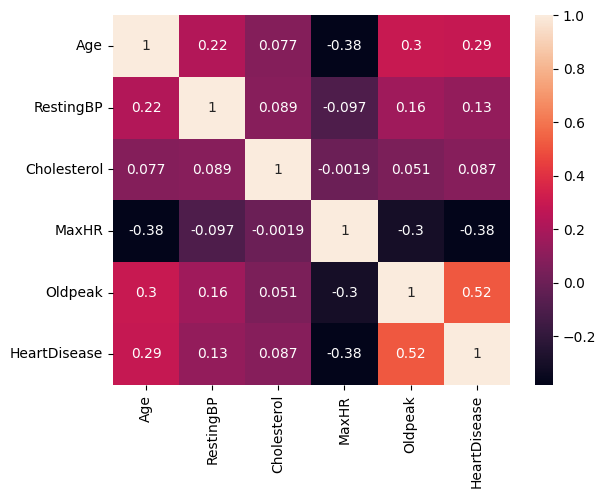

In [44]:
x=filtered_data[["Age","RestingBP","Cholesterol","MaxHR","Oldpeak","HeartDisease"]]
corr=x.corr()
sns.heatmap(corr,annot=True)


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(filtered_data[["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak","HeartDisease"]])
scaled_data
scaled_df=pd.DataFrame(scaled_data,columns=["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak","HeartDisease"])
scaled_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,0.244898,0.615385,0.660194,0.0,0.770992,0.027027,0.0
1,0.428571,0.871795,0.307443,0.0,0.648855,0.297297,1.0
2,0.183673,0.487179,0.640777,0.0,0.206107,0.027027,0.0
3,0.408163,0.589744,0.417476,0.0,0.282443,0.432432,1.0
4,0.530612,0.743590,0.355987,0.0,0.389313,0.027027,0.0
...,...,...,...,...,...,...,...
582,0.591837,0.615385,0.504854,0.0,0.396947,0.081081,1.0
583,0.346939,0.230769,0.579288,0.0,0.465649,0.351351,1.0
584,0.591837,0.487179,0.148867,0.0,0.335878,0.351351,1.0
585,0.591837,0.487179,0.488673,0.0,0.786260,0.027027,1.0


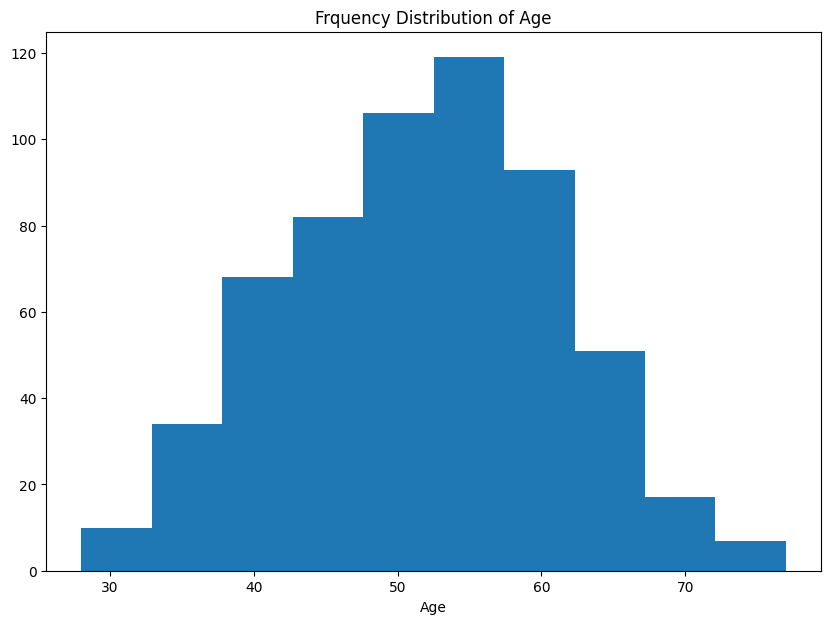

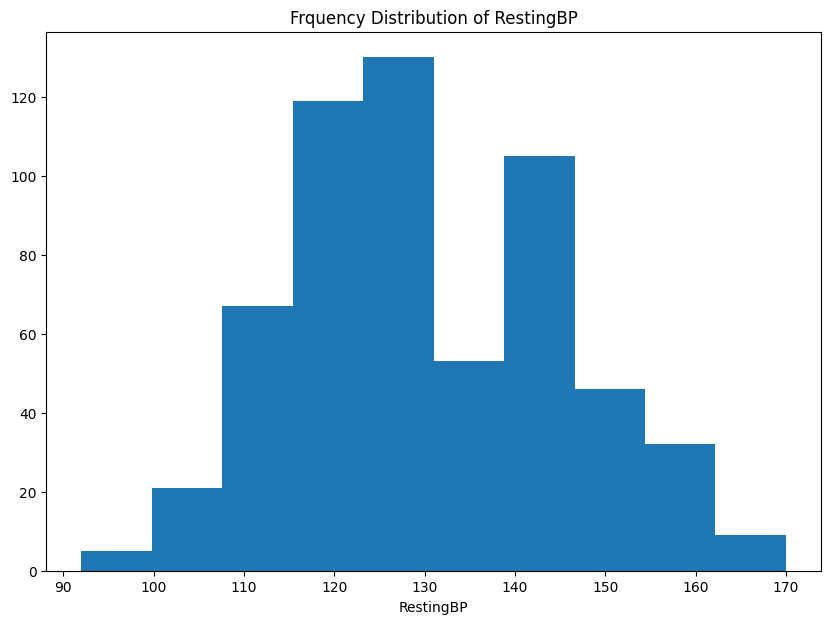

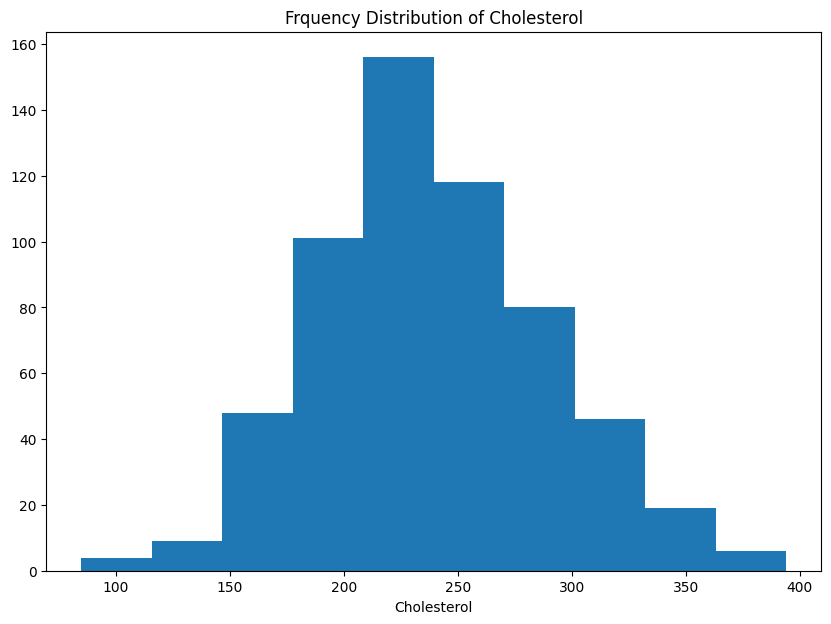

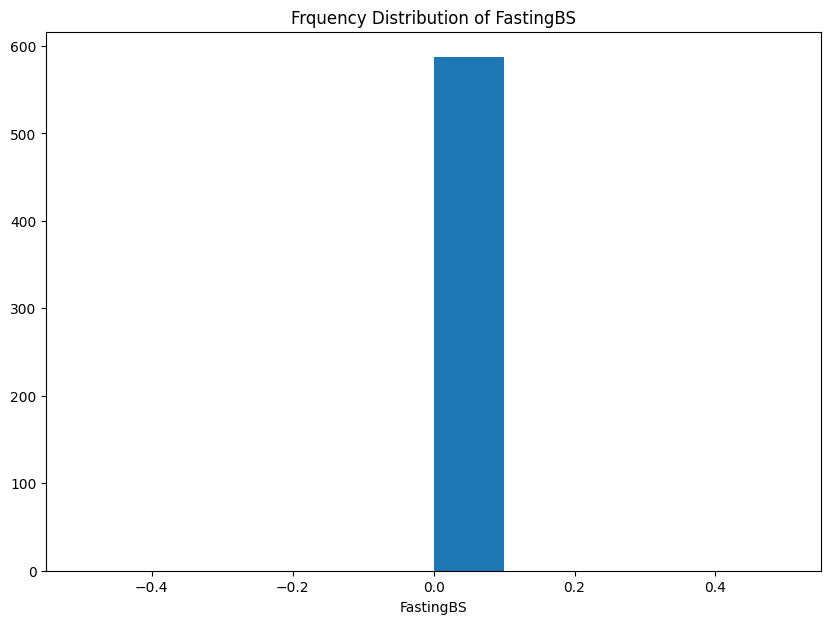

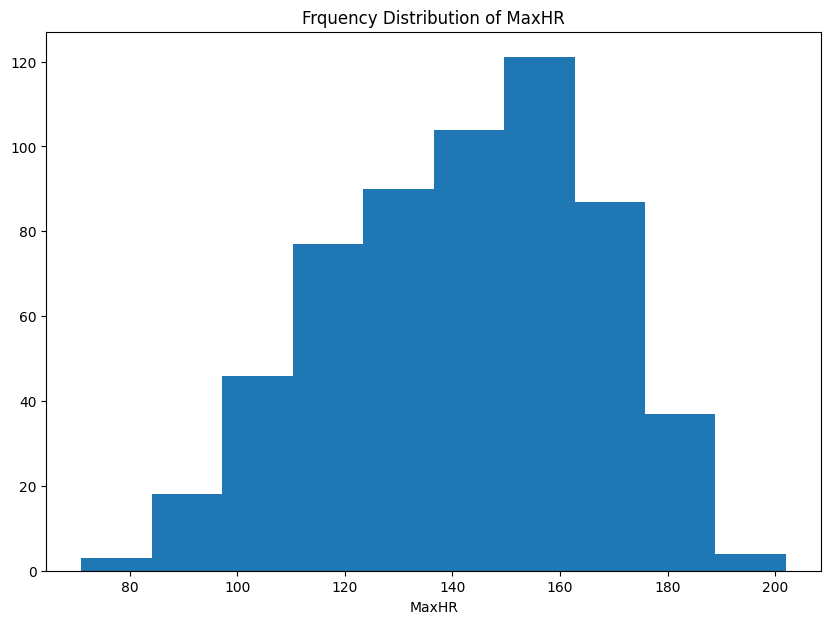

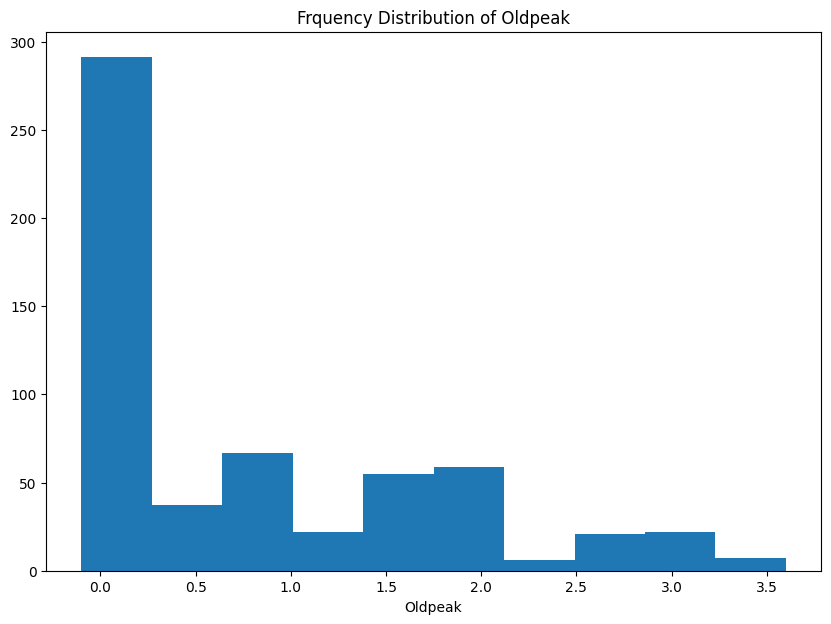

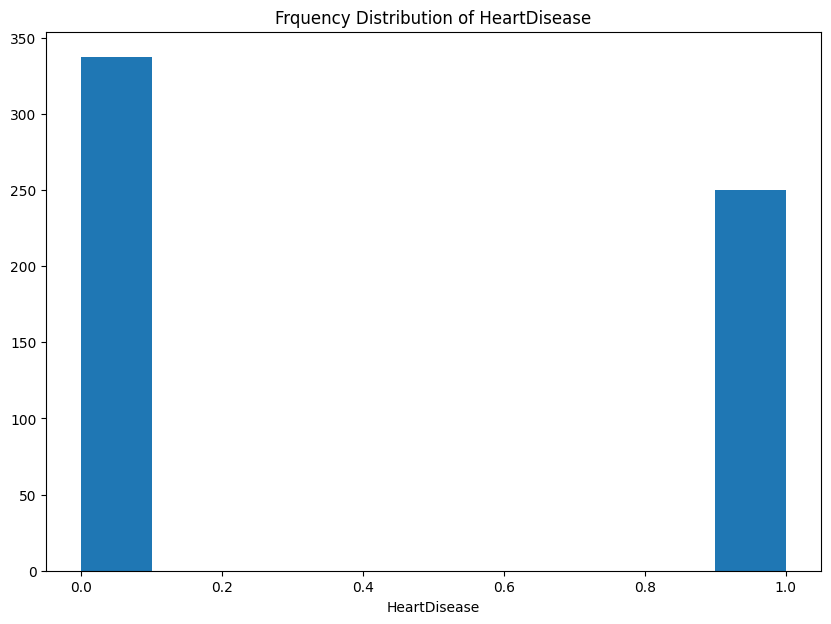

In [14]:
for col in filtered_data.select_dtypes(include=["number"]).columns:
  plt.figure(figsize=(10,7))
  plt.hist(filtered_data[col])
  plt.xlabel(col)
  plt.title(f"Frquency Distribution of {col}")

In [15]:
filtered_data_cat=filtered_data.drop(columns=["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak","HeartDisease"])
filtered_data_cat=filtered_data_cat.reset_index(drop=True)
merged=pd.concat([filtered_data_cat,scaled_df],axis="columns")
merged

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,M,ATA,Normal,N,Up,0.244898,0.615385,0.660194,0.0,0.770992,0.027027,0.0
1,F,NAP,Normal,N,Flat,0.428571,0.871795,0.307443,0.0,0.648855,0.297297,1.0
2,M,ATA,ST,N,Up,0.183673,0.487179,0.640777,0.0,0.206107,0.027027,0.0
3,F,ASY,Normal,Y,Flat,0.408163,0.589744,0.417476,0.0,0.282443,0.432432,1.0
4,M,NAP,Normal,N,Up,0.530612,0.743590,0.355987,0.0,0.389313,0.027027,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
582,F,ASY,Normal,Y,Flat,0.591837,0.615385,0.504854,0.0,0.396947,0.081081,1.0
583,M,TA,Normal,N,Flat,0.346939,0.230769,0.579288,0.0,0.465649,0.351351,1.0
584,M,ASY,Normal,Y,Flat,0.591837,0.487179,0.148867,0.0,0.335878,0.351351,1.0
585,F,ATA,LVH,N,Flat,0.591837,0.487179,0.488673,0.0,0.786260,0.027027,1.0


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat_col=["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]
for col in cat_col:
  merged[col]=le.fit_transform(merged[col])

merged=merged.reset_index(drop=True)

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
filtered_data_num=filtered_data
cat_col=["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]
for col in cat_col:
   filtered_data_num[col]=le.fit_transform(filtered_data[col])

filtered_data_num

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,0,0,140,241,0,1,123,1,0.2,1,1
913,45,1,3,110,264,0,1,132,0,1.2,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [18]:
x=merged.drop(["HeartDisease"],axis=1)
y=merged.HeartDisease

In [19]:
from sklearn.decomposition import PCA
pca=PCA(0.75)
X_pca=pca.fit_transform(x)
pca.explained_variance_ratio_

array([0.4526716 , 0.17656106, 0.16033366])

Text(0, 0.5, 'SSE')

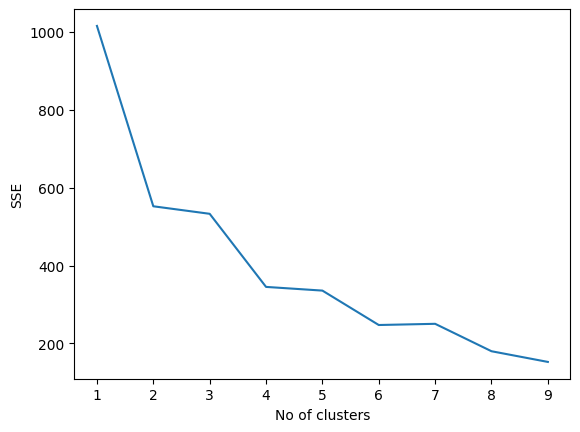

In [20]:
from sklearn.cluster import KMeans

k_range=range(1,10)
sse=[]
for k in k_range:
  km=KMeans(n_clusters=k)
  km.fit_predict(X_pca)
  sse.append(km.inertia_)

plt.plot(k_range,sse)
plt.xlabel("No of clusters")
plt.ylabel("SSE")


In [21]:
from sklearn.model_selection import RandomizedSearchCV
para={"n_clusters":[1,2],"init":["k-means++","random"],"n_init":[10,20,30,40,50],"max_iter":[100,200,300,400,500]}
clf=RandomizedSearchCV(KMeans(),para,cv=5,n_iter=200,return_train_score=False,verbose=1)
clf.fit(X_pca)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=KMeans(), n_iter=200,
                   param_distributions={'init': ['k-means++', 'random'],
                                        'max_iter': [100, 200, 300, 400, 500],
                                        'n_clusters': [1, 2],
                                        'n_init': [10, 20, 30, 40, 50]},
                   verbose=1)

In [22]:
score=clf.best_score_
para=clf.best_params_

print(f'Best Score is {round(score,3)} Best parameters are {para}')

Best Score is -120.069 Best parameters are {'n_init': 30, 'n_clusters': 2, 'max_iter': 400, 'init': 'random'}


In [23]:
km = KMeans(n_clusters=2, n_init=10, max_iter=100, init="k-means++", random_state=42)
filt_data=filtered_data.reset_index(drop=True)
original_labels = km.fit_predict(X_pca)
label_mapping = {0: 1, 1: 0}
mapped_labels = np.vectorize(label_mapping.get)(original_labels)
filt_data["Predicted_result"]=mapped_labels
filt_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Predicted_result
0,40,1,1,140,289,0,1,172,0,0.0,2,0,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1,0
2,37,1,1,130,283,0,2,98,0,0.0,2,0,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,57,0,0,140,241,0,1,123,1,0.2,1,1,1
583,45,1,3,110,264,0,1,132,0,1.2,1,1,0
584,57,1,0,130,131,0,1,115,1,1.2,1,1,1
585,57,0,1,130,236,0,0,174,0,0.0,1,1,0


In [24]:
from sklearn.metrics import silhouette_score
score = round(silhouette_score(X_pca,mapped_labels),3)
from sklearn.metrics import adjusted_rand_score
ari=round(adjusted_rand_score(y,mapped_labels),3)
print(f'Score is {score} and ARI score is {ari}')

Score is 0.426 and ARI score is 0.279


In [25]:
df1=filt_data[filt_data["Predicted_result"]==0]
df2=filt_data[filt_data["Predicted_result"]==1]
df3=filt_data[filt_data["HeartDisease"]==0]
df4=filt_data[filt_data["HeartDisease"]==1]

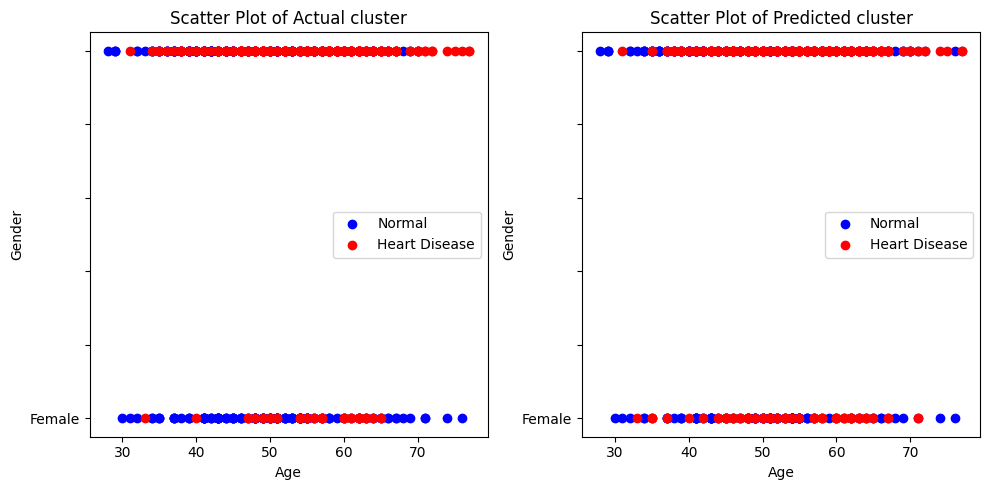

In [26]:
fig,axis= plt.subplots(1,2,figsize=(10,5))
axis[0].scatter(df3.Age,df3.Sex,color="blue",label="Normal")
axis[0].scatter(df4.Age,df4.Sex,color="red",label="Heart Disease")
axis[0].set_title("Scatter Plot of Actual cluster")
axis[0].set_xlabel("Age")
axis[0].set_ylabel("Gender")
axis[0].legend()
axis[0].set_yticklabels(['Male', 'Female'])

axis[1].scatter(df1.Age,df1.Sex,color="blue",label="Normal")
axis[1].scatter(df2.Age,df2.Sex,color="red",label="Heart Disease")
axis[1].set_title("Scatter Plot of Predicted cluster")
axis[1].set_xlabel("Age")
axis[1].set_ylabel("Gender")
axis[1].legend()
axis[1].set_yticklabels(['Male', 'Female'])

plt.tight_layout()
plt.show()

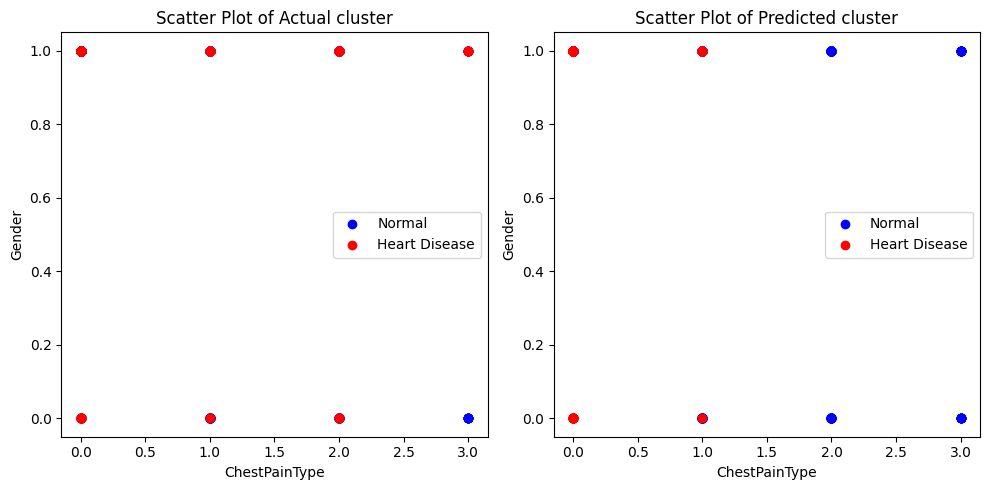

In [27]:
fig,axis= plt.subplots(1,2,figsize=(10,5))
axis[0].scatter(df3.ChestPainType,df3.Sex,color="blue",label="Normal")
axis[0].scatter(df4.ChestPainType,df4.Sex,color="red",label="Heart Disease")
axis[0].set_title("Scatter Plot of Actual cluster")
axis[0].set_xlabel("ChestPainType")
axis[0].set_ylabel("Gender")
axis[0].legend()

axis[1].scatter(df1.ChestPainType,df1.Sex,color="blue",label="Normal")
axis[1].scatter(df2.ChestPainType,df2.Sex,color="red",label="Heart Disease")
axis[1].set_title("Scatter Plot of Predicted cluster")
axis[1].set_xlabel("ChestPainType")
axis[1].set_ylabel("Gender")
axis[1].legend()

plt.tight_layout()
plt.show()

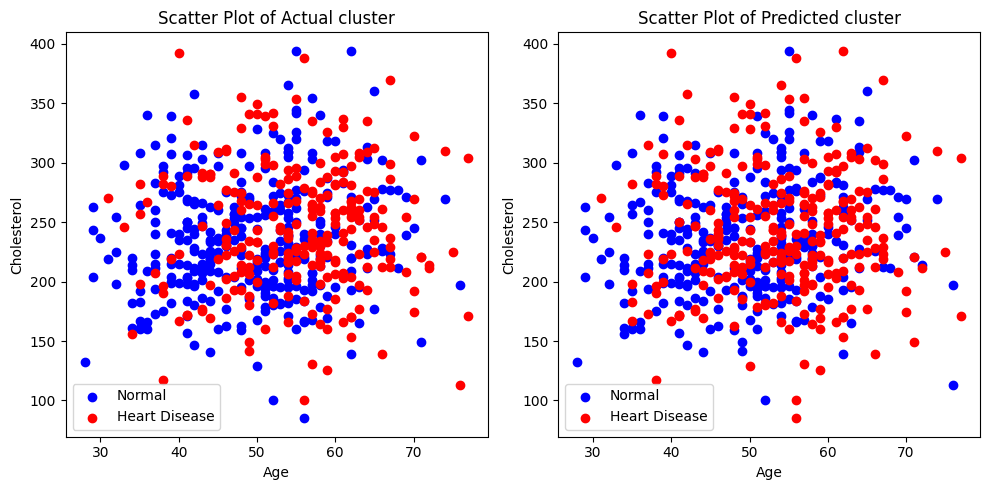

In [28]:
fig,axis= plt.subplots(1,2,figsize=(10,5))
axis[0].scatter(df3.Age,df3.Cholesterol,color="blue",label="Normal")
axis[0].scatter(df4.Age,df4.Cholesterol,color="red",label="Heart Disease")
axis[0].set_title("Scatter Plot of Actual cluster")
axis[0].set_xlabel("Age")
axis[0].set_ylabel("Cholesterol")
axis[0].legend()

axis[1].scatter(df1.Age,df1.Cholesterol,color="blue",label="Normal")
axis[1].scatter(df2.Age,df2.Cholesterol,color="red",label="Heart Disease")
axis[1].set_title("Scatter Plot of Predicted cluster")
axis[1].set_xlabel("Age")
axis[1].set_ylabel("Cholesterol")
axis[1].legend()
plt.tight_layout()
plt.show()

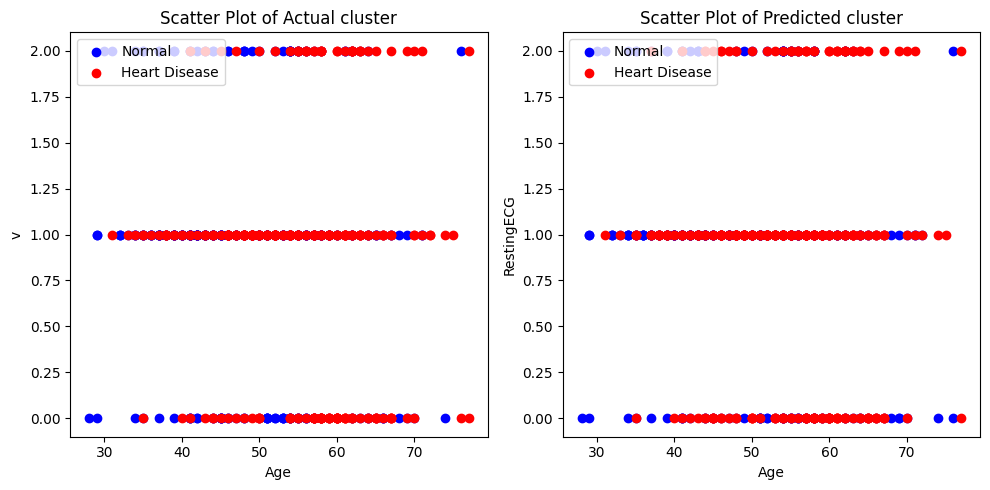

In [29]:
fig,axis= plt.subplots(1,2,figsize=(10,5))
axis[0].scatter(df3.Age,df3.RestingECG,color="blue",label="Normal")
axis[0].scatter(df4.Age,df4.RestingECG,color="red",label="Heart Disease")
axis[0].set_title("Scatter Plot of Actual cluster")
axis[0].set_xlabel("Age")
axis[0].set_ylabel("v")
axis[0].legend()

axis[1].scatter(df1.Age,df1.RestingECG,color="blue",label="Normal")
axis[1].scatter(df2.Age,df2.RestingECG,color="red",label="Heart Disease")
axis[1].set_title("Scatter Plot of Predicted cluster")
axis[1].set_xlabel("Age")
axis[1].set_ylabel("RestingECG")
axis[1].legend()
plt.tight_layout()
plt.show()

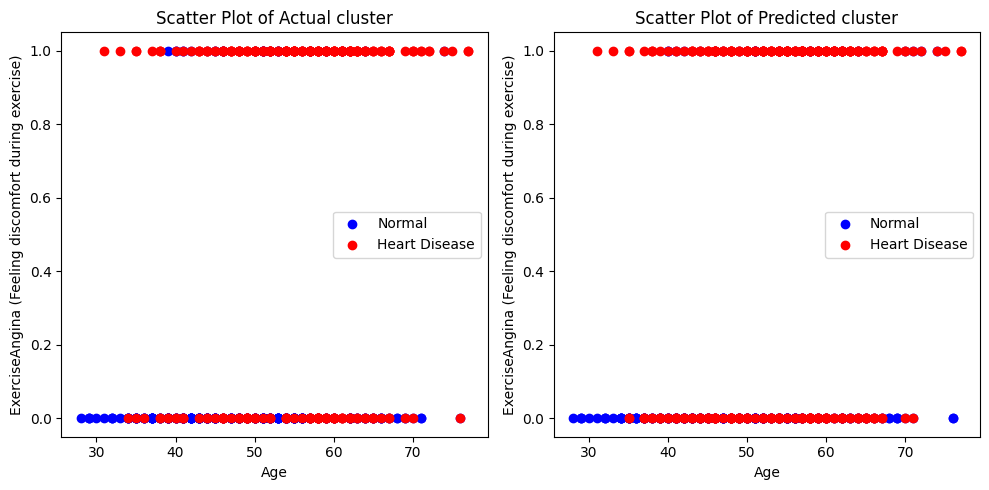

In [30]:
fig,axis= plt.subplots(1,2,figsize=(10,5))
axis[0].scatter(df3.Age,df3.ExerciseAngina,color="blue",label="Normal")
axis[0].scatter(df4.Age,df4.ExerciseAngina,color="red",label="Heart Disease")
axis[0].set_title("Scatter Plot of Actual cluster")
axis[0].set_xlabel("Age")
axis[0].set_ylabel("ExerciseAngina (Feeling discomfort during exercise)")
axis[0].legend()

axis[1].scatter(df1.Age,df1.ExerciseAngina,color="blue",label="Normal")
axis[1].scatter(df2.Age,df2.ExerciseAngina,color="red",label="Heart Disease")
axis[1].set_title("Scatter Plot of Predicted cluster")
axis[1].set_xlabel("Age")
axis[1].set_ylabel("ExerciseAngina (Feeling discomfort during exercise)")
axis[1].legend()

plt.tight_layout()
plt.show()

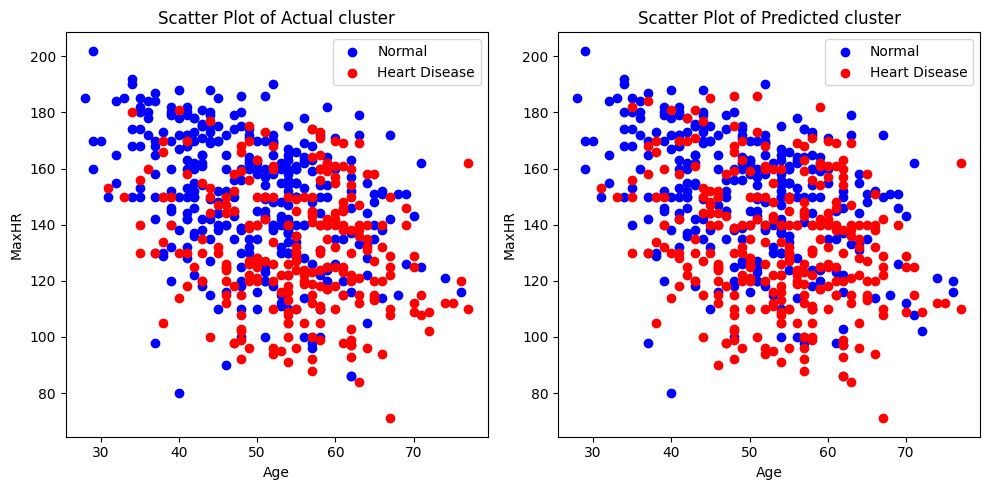

In [31]:
fig,axis= plt.subplots(1,2,figsize=(10,5))
axis[0].scatter(df3.Age,df3.MaxHR,color="blue",label="Normal")
axis[0].scatter(df4.Age,df4.MaxHR,color="red",label="Heart Disease")
axis[0].set_title("Scatter Plot of Actual cluster")
axis[0].set_xlabel("Age")
axis[0].set_ylabel("MaxHR")
axis[0].legend()

axis[1].scatter(df1.Age,df1.MaxHR,color="blue",label="Normal")
axis[1].scatter(df2.Age,df2.MaxHR,color="red",label="Heart Disease")
axis[1].set_title("Scatter Plot of Predicted cluster")
axis[1].set_xlabel("Age")
axis[1].set_ylabel("MaxHR")
axis[1].legend()
plt.tight_layout()
plt.show()

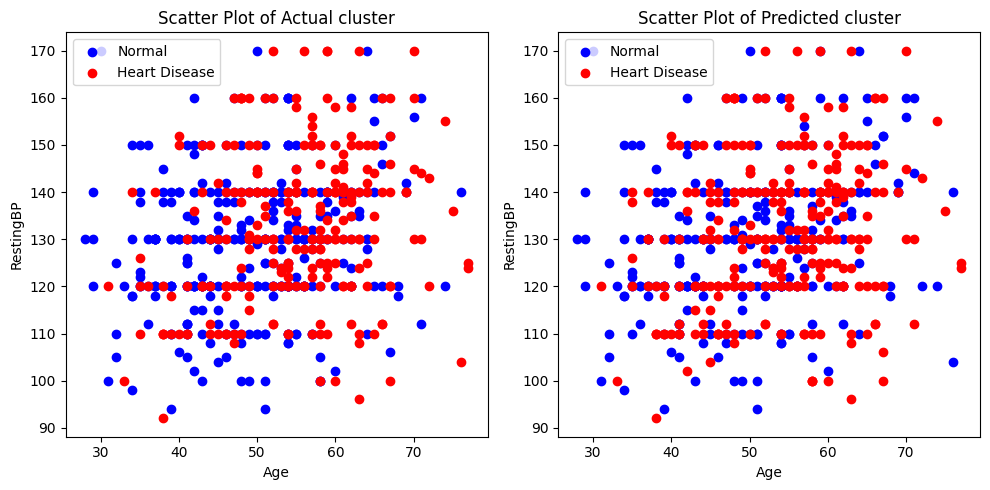

In [32]:
fig,axis= plt.subplots(1,2,figsize=(10,5))
axis[0].scatter(df3.Age,df3.RestingBP,color="blue",label="Normal")
axis[0].scatter(df4.Age,df4.RestingBP,color="red",label="Heart Disease")
axis[0].set_title("Scatter Plot of Actual cluster")
axis[0].set_xlabel("Age")
axis[0].set_ylabel("RestingBP")
axis[0].legend()

axis[1].scatter(df1.Age,df1.RestingBP,color="blue",label="Normal")
axis[1].scatter(df2.Age,df2.RestingBP,color="red",label="Heart Disease")
axis[1].set_title("Scatter Plot of Predicted cluster")
axis[1].set_xlabel("Age")
axis[1].set_ylabel("RestingBP")
axis[1].legend()
plt.tight_layout()
plt.show()

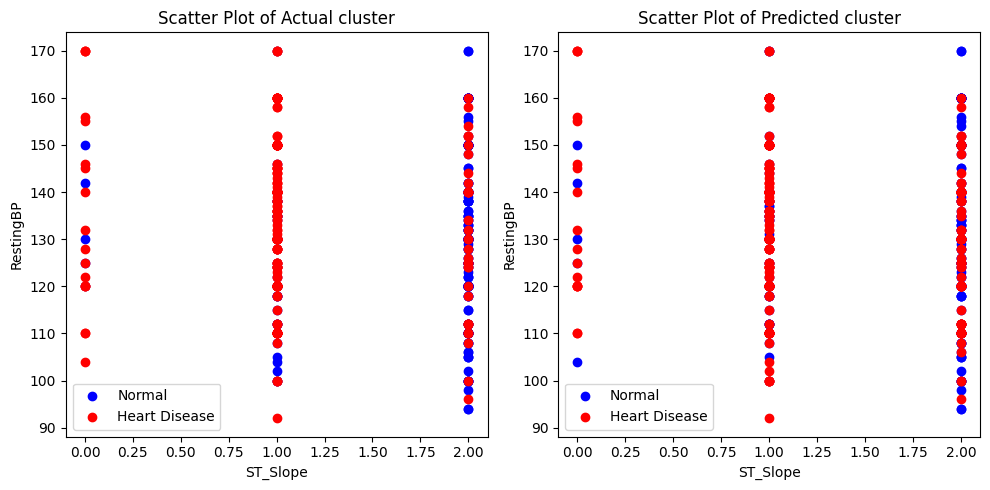

In [33]:
fig,axis= plt.subplots(1,2,figsize=(10,5))
axis[0].scatter(df3.ST_Slope,df3.RestingBP,color="blue",label="Normal")
axis[0].scatter(df4.ST_Slope,df4.RestingBP,color="red",label="Heart Disease")
axis[0].set_title("Scatter Plot of Actual cluster")
axis[0].set_xlabel("ST_Slope")
axis[0].set_ylabel("RestingBP")
axis[0].legend()

axis[1].scatter(df1.ST_Slope,df1.RestingBP,color="blue",label="Normal")
axis[1].scatter(df2.ST_Slope,df2.RestingBP,color="red",label="Heart Disease")
axis[1].set_title("Scatter Plot of Predicted cluster")
axis[1].set_xlabel("ST_Slope")
axis[1].set_ylabel("RestingBP")
axis[1].legend()
plt.tight_layout()
plt.show()

<Axes: >

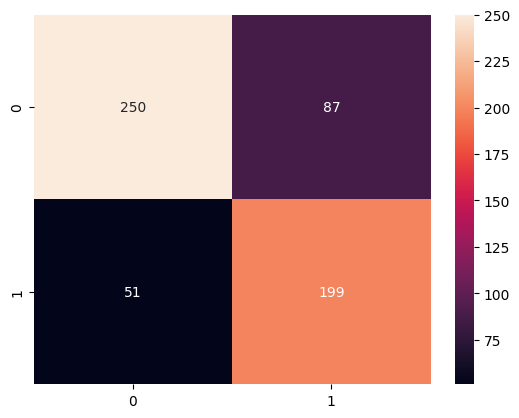

In [34]:
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(y,mapped_labels)
sns.heatmap(cn,annot=True,fmt="d")

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y,mapped_labels))

              precision    recall  f1-score   support

         0.0       0.83      0.74      0.78       337
         1.0       0.70      0.80      0.74       250

    accuracy                           0.76       587
   macro avg       0.76      0.77      0.76       587
weighted avg       0.77      0.76      0.77       587

